# Mineração Estatística de Dados 2019
    Nome: Ricardo França Fernandes do Vale       Número USP: 9293477
    Nome: André Alves Ambrósio                   Número USP: 9762852

##  Efeito de ruído comparando Random Forest e Redes Neurais

Será utilizado um gerador de dados do scikit para montar um dataset em que há exemplos de duas classes diferentes que "se misturam", à medida que é introduzido ruído na base, dada a representação gráfica. 

A intenção é observar a relação entre a acurácia e a taxa de ruído p utilizando como classificadores as redes neurais (Multilayer Perceptron) e as florestas aletórias.

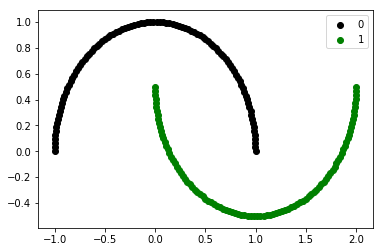

In [3]:
import random
random.seed(1)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as skdata
from matplotlib import pyplot
import warnings
warnings.filterwarnings('ignore')

n_samples = 200
p = 0
X, y = skdata.make_moons(n_samples=n_samples, noise=p)

d = np.column_stack((X, np.transpose(y)))
data = pd.DataFrame(data = d, columns=['X1', 'X2', 'y'])
features = ['X1', 'X2']
labels = np.unique(y)

# Representação Gráfica dos Dados
colors = ['black', 'green']
aux = 0
for c in labels:
    ind = np.where(y == c)
    plt.scatter(X[ind, 0][0], X[ind, 1][0], color = colors[aux], label = c)
    aux = aux + 1
plt.legend()
plt.show()

O exemplo acima é a representação gráfica dos dados gerados pela função make_moons sem ruído. Será incluído ruído de 0 a 100% com um acréscimo de 5% a cada iteração.

Nesta etapa serão utilizados os classificadores.

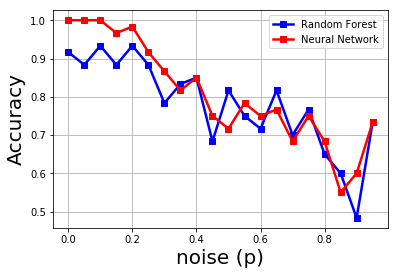

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

n_samples = 200
holdout = 0.3

rf_accuracies = []
mlp_accuracies = []


for p in np.arange(0, 1, 0.05):
    X, y = skdata.make_moons(n_samples=n_samples, noise=p)

    d = np.column_stack((X, np.transpose(y)))
    data = pd.DataFrame(data = d, columns=['X1', 'X2', 'y'])
    
    # Determinando classes (Y) e features (X)
    Y = np.array(data[data.columns[-1]],dtype=str)
    X = np.array(data.drop(data.columns[-1], axis = 1))

    # Treinamento e Teste
    # Uso do Random Forest
    scaler = StandardScaler().fit(X)
    X_scaled = scaler.transform(X)
    train_x, test_x, train_y, test_y = train_test_split(X_scaled, Y, test_size = holdout, random_state = 42)
    rf = RandomForestClassifier(max_depth=2, random_state=0)
    rf.fit(train_x, train_y)
    pred_y = rf.predict(test_x)
    rf_accuracies.append(accuracy_score(pred_y, test_y))
   

    # Uso das redes neurais
    train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = holdout, random_state = 42)
    scaler = MinMaxScaler()  
    scaler.fit(train_x)  
    train_x = scaler.transform(train_x)  
    test_x = scaler.transform(test_x)  
    mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100, 50), random_state=1)
    mlp.fit(train_x, train_y);
    pred_y = mlp.predict(test_x)
    mlp_accuracies.append(accuracy_score(pred_y, test_y))
    
# Criando o grafico
plt.plot(np.arange(0, 1, 0.05), rf_accuracies, marker='s', linestyle='-', color='blue', linewidth=2.5, label='Random Forest')
plt.plot(np.arange(0, 1, 0.05), mlp_accuracies, marker='s', linestyle='-', color='red', linewidth=2.5, label='Neural Network')
plt.xlabel("noise (p)", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.grid(True)
plt.legend()
plt.show(True)

Deste modo, nota-se que ambos classificadores possuem comportamentos semelhantes, porém Redes Neurais destaca-se para ruídos menores (de até 40%). 

Para ruídos > 40% oscila muito quem é o melhor classificador.

# Efeito da quantidade de árvores no Random Forest

A partir de agora, será utilizado a base de dados Vehicle

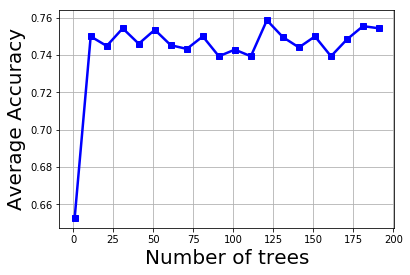

In [6]:
vehicle = pd.read_csv('./Vehicle.csv', header=(0))
Y = np.array(vehicle[vehicle.columns[-1]],dtype=str)
X = np.array(vehicle.drop(vehicle.columns[-1], axis = 1))

estimators = np.arange(1, 200, 10)
scores = []
n_simulations = 10 
for n in estimators:
    p = 0.7
    accuracy = []
    for s in range(0, n_simulations): 
        train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 1-p)
        rf = RandomForestClassifier(n_estimators=n, random_state=0)
        rf.fit(train_x, train_y)
        pred_y = rf.predict(test_x)
        accuracy.append(accuracy_score(pred_y, test_y))
    scores.append(np.mean(accuracy))
plt.plot(estimators, scores, marker='s', linestyle='-', color="blue", linewidth=2.5)
plt.xlabel("Number of trees", fontsize=20)
plt.ylabel("Average Accuracy", fontsize=20)
plt.grid(True)
plt.show(True) 

Pelo gráfico acima, é perceptível a oscilação da acurácia média de acordo com a variação da quantidade de árvores.

Todavia, podemos escolher algo próximo de 125 árvores para maximizar a acurácia para estes dados.

# Efeito da quantidade de camadas para Redes Neurais


Layers: (10,)
Acurracy:  0.799475065616798
Layers: (10, 10)
Acurracy:  0.7863517060367455
Layers: (10, 10, 10)
Acurracy:  0.7060367454068242
Layers: (10, 10, 10, 10)
Acurracy:  0.7564304461942257
Layers: (10, 10, 10, 10, 10)
Acurracy:  0.6404199475065616
Layers: (10, 10, 10, 10, 10, 10)
Acurracy:  0.7246719160104986
Layers: (10, 10, 10, 10, 10, 10, 10)
Acurracy:  0.6086614173228345
Layers: (10, 10, 10, 10, 10, 10, 10, 10)
Acurracy:  0.6034120734908136
Layers: (10, 10, 10, 10, 10, 10, 10, 10, 10)
Acurracy:  0.5270341207349081
Layers: (10, 10, 10, 10, 10, 10, 10, 10, 10, 10)
Acurracy:  0.5905511811023622
Layers: (10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10)
Acurracy:  0.6220472440944882
Layers: (10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10)
Acurracy:  0.22388451443569554
Layers: (10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10)
Acurracy:  0.2409448818897638
Layers: (10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10)
Acurracy:  0.22650918635170605
Layers: (10, 10, 10, 10, 10, 10,

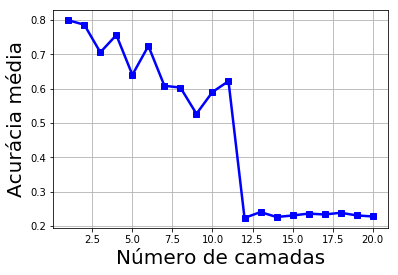

In [7]:
nneurons = 10
layers = (nneurons,)

vscore = []
max_layers = 20 
simulations = 15

for n in np.arange(1, max_layers+1):
    print('Layers:', layers)    
    layers = layers + (nneurons,)
    p = 0.7
    accuracy = []
    
    for s in range(0, simulations):
        train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 1-p)
        scaler = MinMaxScaler()  
        scaler.fit(train_x)  
        train_x = scaler.transform(train_x)  
        test_x = scaler.transform(test_x)  
        clf = MLPClassifier(solver = 'lbfgs', alpha = 1e-5, hidden_layer_sizes=layers, random_state=1)
        clf.fit(train_x, train_y)
        pred_y = clf.predict(test_x)
        accuracy.append(accuracy_score(pred_y, test_y))

    vscore.append(np.mean(accuracy))
    print('Acurracy: ', np.mean(accuracy))

plt.plot(np.arange(1, max_layers+1), vscore, marker = 's', linestyle = '-', color = "blue", linewidth = 2.5)
plt.xlabel("Número de camadas", fontsize=20) 
plt.ylabel("Acurácia média", fontsize=20)
plt.grid(True)
plt.show(True)

Pelo gráfico acima temos que 1 camada consegue atingir a maior acurácia, segundo o método lbfgs. E também nota-se que a partir de 12 camadas a acurácia cai drasticamente. Para os próximos experimentos será utilizada a rede neural com 1 camada escondida, escolha também motivada pelo Teorema da Aproximação Universal (TAU) que postula que redes neurais com uma camada escondida apenas conseguem convergir, nem sempre sendo a solução ótima.

Note que foi retirada do gráfico a acurácia da rede neural com 0 camadas. Pois embora o algoritmo consiga calcular o seu valor, não faz sentido considerar uma rede neural desse tipo. 

# Comparando parâmetros para Redes Neurais
### Métodos LBFGS, SGD e ADAM.

In [8]:
nneurons = 10

vscore_lbfgs = []
vscore_sgd = []
vscore_adam = []
vlayers = []

# 1 Camada ESCONDIDA foi o melhor (Já que a camada 0 não faz sentido)
simulations = 15 
layers = (nneurons,)

p = 0.7

accuracy_lbfgs = []
accuracy_sgd = []
accuracy_adam = []

for s in range(0, simulations):
    train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 1-p)
    scaler = MinMaxScaler()  
    scaler.fit(train_x)  
    train_x = scaler.transform(train_x)  
    test_x = scaler.transform(test_x)  
    
    clf_lbfgs = MLPClassifier(solver = 'lbfgs', alpha = 1e-5, hidden_layer_sizes = layers, random_state = 1)
    clf_lbfgs.fit(train_x, train_y);
    
    clf_sgd = MLPClassifier(solver = 'sgd', alpha = 1e-5, hidden_layer_sizes = layers, random_state = 1)
    clf_sgd.fit(train_x, train_y);
    
    clf_adam = MLPClassifier(solver = 'adam', alpha = 1e-5, hidden_layer_sizes = layers, random_state = 1)
    clf_adam.fit(train_x, train_y);
    
    
    pred_y = clf_lbfgs.predict(test_x)
    accuracy_lbfgs.append(accuracy_score(pred_y, test_y))
    
    pred_y = clf_sgd.predict(test_x)
    accuracy_sgd.append(accuracy_score(pred_y, test_y))
    
    pred_y = clf_adam.predict(test_x)
    accuracy_adam.append(accuracy_score(pred_y, test_y))
    
vscore_lbfgs.append(np.mean(accuracy_lbfgs))
vscore_sgd.append(np.mean(accuracy_sgd))
vscore_adam.append(np.mean(accuracy_adam))
    
print(vscore_lbfgs)
print(vscore_sgd)
print(vscore_adam)

df_neurais = pd.DataFrame(
    {
        "Método" : ['LBFGS', 'SGD', 'ADAM'],
        "Acuracia" : [vscore_lbfgs, vscore_sgd, vscore_adam]
    
    }
)
df_neurais


[0.7968503937007873]
[0.35984251968503944]
[0.6233595800524935]


,Método,Acuracia
0,LBFGS,[0.7968503937007873]
1,SGD,[0.35984251968503944]
2,ADAM,[0.6233595800524935]


Temos que para 1 camada, o método LBFGS possui a melhor acurácia (79.69%) Enquanto o método SGD possui uma acurácia muito baixa (35.98%). E o Método ADAM fica no meio termo, porém inferior notavelmente ao LBFGS, com 62.33% de acurácia.

# Influência da proporção do conjunto de treinamento na acurácia

Iremos checar para ambos classificadores qual o ponto ótimo do conjunto de treinamento do modelo

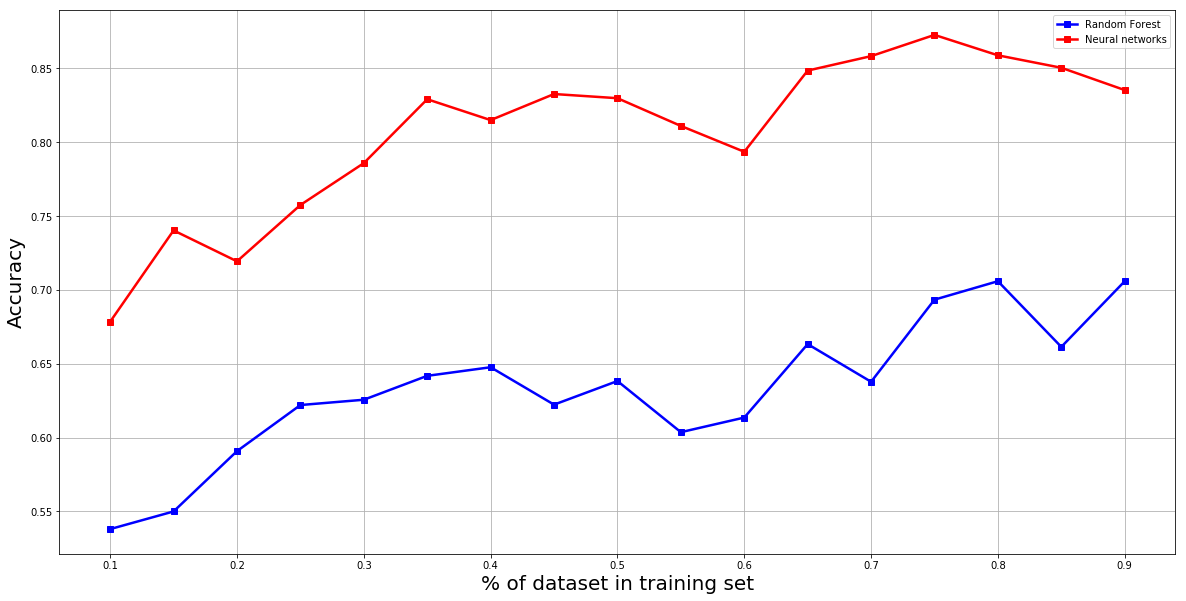

In [9]:
i = -1
colors = ['blue', 'red']
rf_scores = []
mlp_scores = []
training_range = np.arange(0.1, 0.95, 0.05)

Y = np.array(vehicle[vehicle.columns[-1]],dtype=str)
X = np.array(vehicle.drop(vehicle.columns[-1], axis = 1))

plt.figure(figsize=(20,10))
for p in training_range:
    # Treinamento e Teste
    # Uso do Random Forest
    scaler = StandardScaler().fit(X)
    X_scaled = scaler.transform(X)
    train_x, test_x, train_y, test_y = train_test_split(X_scaled, Y, test_size = 1-p, random_state = 42)
    rf = RandomForestClassifier(max_depth=2, random_state=0)
    rf.fit(train_x, train_y)
    pred_y = rf.predict(test_x)
    rf_scores.append(accuracy_score(pred_y, test_y))

    # Uso das redes neurais
    train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 1-p, random_state = 42)
    scaler = MinMaxScaler()  
    scaler.fit(train_x)  
    train_x = scaler.transform(train_x)  
    test_x = scaler.transform(test_x)  
    mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100, 50), random_state=1)
    mlp.fit(train_x, train_y);
    pred_y = mlp.predict(test_x)
    mlp_scores.append(accuracy_score(pred_y, test_y))

plt.plot(training_range, rf_scores, marker='s', linestyle='-', color=colors[0], linewidth=2.5, label='Random Forest')
plt.plot(training_range, mlp_scores, marker='s', linestyle='-', color=colors[1], linewidth=2.5, label='Neural networks')
plt.xlabel("% of dataset in training set", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.grid(True)
plt.legend()

Temos que um conjunto de treinamento de 75%~80% apresenta melhores acurácias para os classificadores em questão.

# Conclusão

De acordo com os itens levantados, há alguns pontos principais:

- É sempre necessário verificar quais métodos e parâmetros faz mais sentido para o seu conjunto de dados, independente do tipo de classificador que será utilizado. Como por exemplo 
    - Quantidade de camadas para redes neurais
    - Quantidade de árvores para random forest
    - Tamanho do conjunto de treinamento
    - Checar qual classificador se adequa melhor a ruído nos dados
    - Métodos diferentes para o mesmo classificador (como lbfgs, adam, sgd em random forest)
- Para nosso conjunto de dados o classificador de Redes Neurais apresentou melhores resultados que Random Forest para ruídos menores, não dependente da proporção do conjunto de treinamento